# Diabetis Data Python Ensemble methods

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'D:\\python\\R and python practice\\Module 20\\Assignment\\Archive'

In [3]:
df = pd.read_csv("Diabetes_RF.csv")

In [5]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [8]:
df.keys()

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

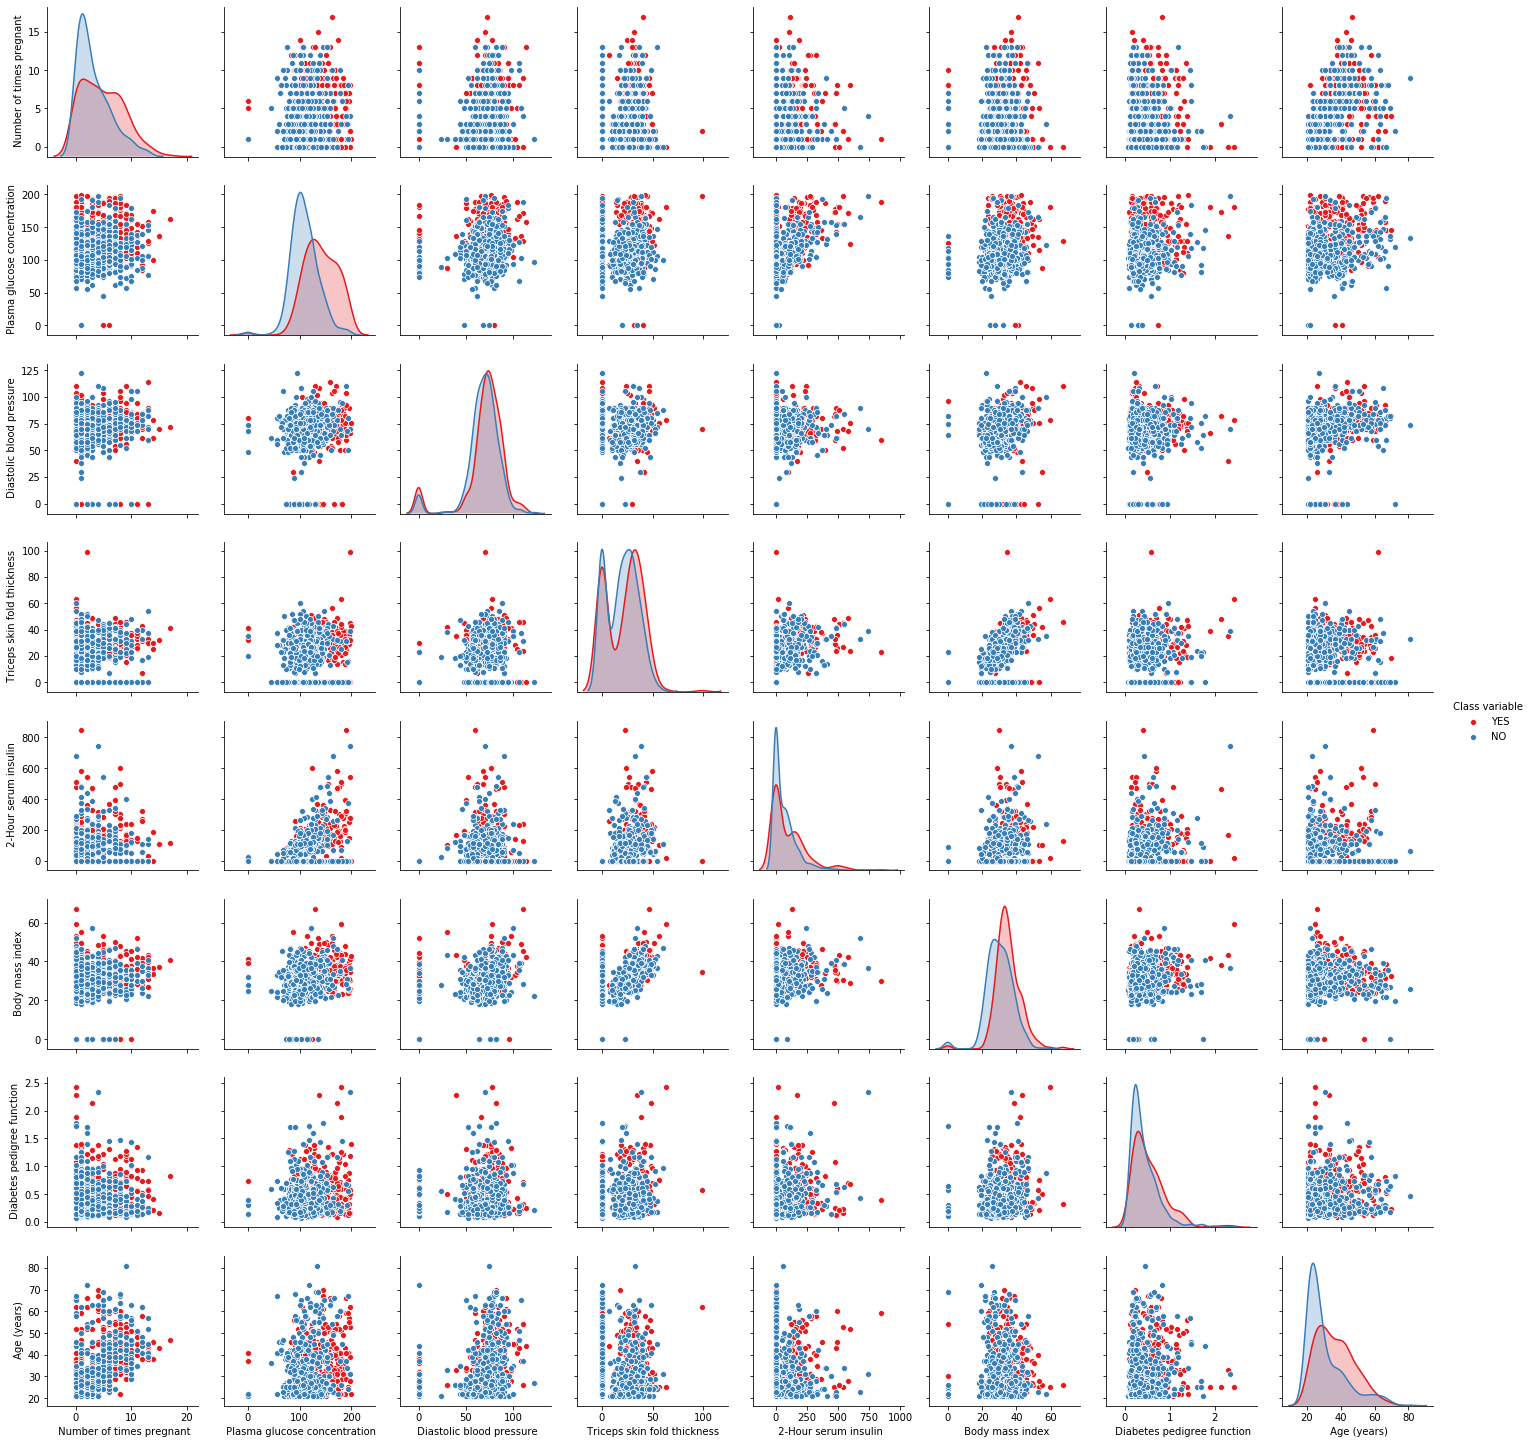

In [15]:
sns.pairplot(df,hue=' Class variable',palette='Set1')

# Train test Split

In [12]:
X = df.drop(' Class variable',axis=1)
y = df[' Class variable']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Bagging Classifier

In [19]:
from sklearn.ensemble import BaggingClassifier # imported bagging classifier algorithm 
BaggingClassifier?

In [20]:
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier(n_neighbors=3)

In [21]:
# lets make a bagging classifier
bag = BaggingClassifier(
    m, 
    max_samples=.5, 
    max_features=2, 
    n_jobs=2,
    oob_score=True)

In [22]:
bag.fit(X_train, y_train) # 

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=3, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=2,
                  max_samples=0.5, n_estimators=10, n_jobs=2, oob_score=True,
                  random_state=None, verbose=0, warm_start=False)

# Predictions and Evaluations of Bagging

In [23]:
pred = bag.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[133  10]
 [ 68  20]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          NO       0.66      0.93      0.77       143
         YES       0.67      0.23      0.34        88

    accuracy                           0.66       231
   macro avg       0.66      0.58      0.56       231
weighted avg       0.66      0.66      0.61       231



In [27]:
bag.oob_score_

0.6852886405959032

In [32]:
bag.score(X, y)

0.75

# Descision Tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier?

In [30]:
Ds = DecisionTreeClassifier()

In [31]:
Ds.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Predictions and Evaluations of Descision Tree classifer

In [33]:
pred = Ds.predict(X_test) 

In [34]:
print(confusion_matrix(y_test,pred))

[[143   0]
 [  0  88]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       143
         YES       1.00      1.00      1.00        88

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



In [36]:
Ds.score(X,y)

1.0

# Random Forests

In [37]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?

In [38]:
Rm = RandomForestClassifier(n_estimators=20, oob_score=True)

In [39]:
Rm.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

# Predictions and Evaluations of Random classifer

In [40]:
pred = Rm.predict(X_test) 

In [41]:
print(confusion_matrix(y_test,pred))

[[143   0]
 [  0  88]]


In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       143
         YES       1.00      1.00      1.00        88

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



In [43]:
Rm.score(X, y)

0.9921875

# AdaBoost Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier?

In [45]:
Ad = AdaBoostClassifier(base_estimator=None, n_estimators=100)

In [46]:
Ad.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

# Predictions and Evaluations of AdABoost classifer

In [47]:
pred = Ad.predict(X_test) 

In [48]:
print(confusion_matrix(y_test,pred))

[[130  13]
 [ 20  68]]


In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          NO       0.87      0.91      0.89       143
         YES       0.84      0.77      0.80        88

    accuracy                           0.86       231
   macro avg       0.85      0.84      0.85       231
weighted avg       0.86      0.86      0.86       231



In [50]:
Ad.score(X, y)

0.8385416666666666

# Gradient Tree Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier?

In [52]:
Gb = GradientBoostingClassifier(n_estimators=10)

Gb.fit(X, y)

Gb.score(X, y)

0.7942708333333334

# Predictions and Evaluations of Gradient Tree Boosting

In [53]:
pred = Gb.predict(X_test) 

In [54]:
print(confusion_matrix(y_test,pred))

[[138   5]
 [ 42  46]]


In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          NO       0.77      0.97      0.85       143
         YES       0.90      0.52      0.66        88

    accuracy                           0.80       231
   macro avg       0.83      0.74      0.76       231
weighted avg       0.82      0.80      0.78       231



In [56]:
Gb.score(X, y)

0.7942708333333334

# Voting Classifier

In [57]:
from sklearn.ensemble import VotingClassifier
VotingClassifier?

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


Vm = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('rf', RandomForestClassifier()), 
                ('gnb', GaussianNB())], voting='hard')

In [59]:
Vm.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [60]:
Vm.score(X, y)

0.8151041666666666